In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Cleaning/Wrangling/EDA

In [3]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns] # ALternative to standardize headers

In [4]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data = data.drop(['customer', 'number_of_open_complaints','policy_type', 'vehicle_size', 'effective_to_date'], axis=1)

In [6]:
data.isna().sum() # There are no null values

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_policies               0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
dtype: int64

In [7]:
data.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_policies                 int64
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
dtype: object

In [8]:
for col in data.select_dtypes(np.object).columns:
    print(data[col].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


In [9]:
data.shape #before

(9134, 19)

In [10]:
data = data.drop_duplicates()
data.shape # after No duplicates were found

(8971, 19)

In [11]:
data = data = data[data['income']>=0] #remove all rows with negative income
data.shape

(8971, 19)

In [12]:
numericals =data._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,1,384.811147
1,6979.535903,0,94,13,42,8,1131.464935
2,12887.431650,48767,108,18,38,2,566.472247
3,7645.861827,0,106,18,65,7,529.881344
4,2813.692575,43836,73,12,44,1,138.130879


In [13]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car


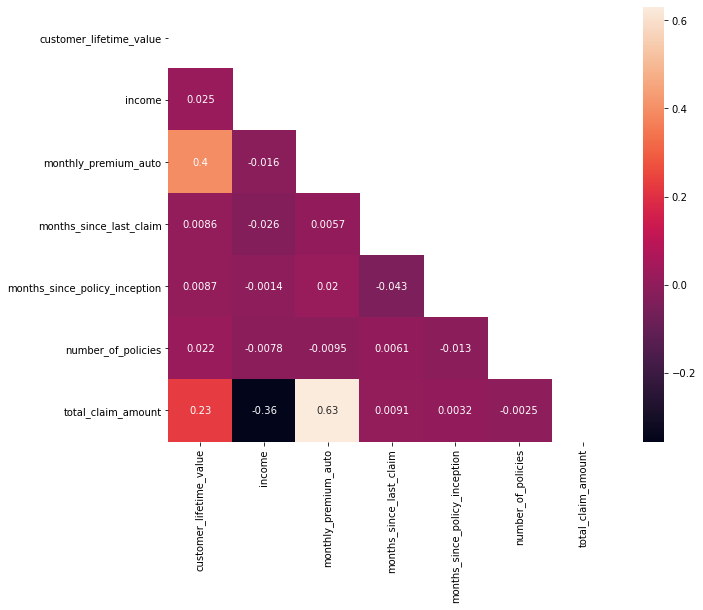

In [14]:
mask=np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals.corr(), mask=mask, annot=True)
plt.show()




In [15]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
count,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,8004.192319,37644.828113,93.192621,15.099209,48.054175,2.970349,433.886437
std,6867.941039,30431.741597,34.358960,10.077668,27.916442,2.391832,291.074428
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000,0.099007
25%,3999.497700,0.000000,68.000000,6.000000,24.000000,1.000000,270.472690
50%,5792.439588,33947.000000,83.000000,14.000000,48.000000,2.000000,383.442328
75%,8954.637109,62365.500000,109.000000,23.000000,71.000000,4.000000,547.988754
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,9.000000,2893.239678


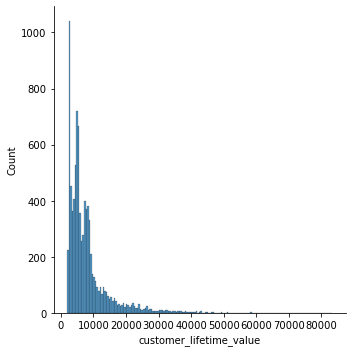

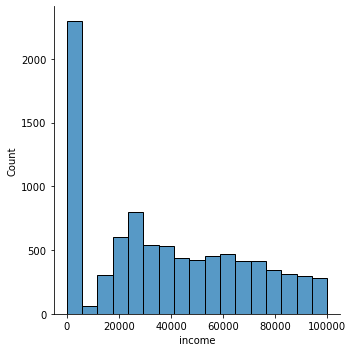

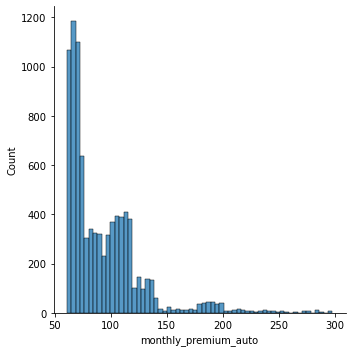

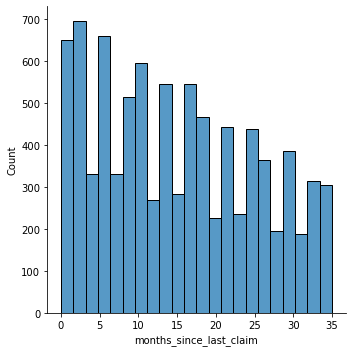

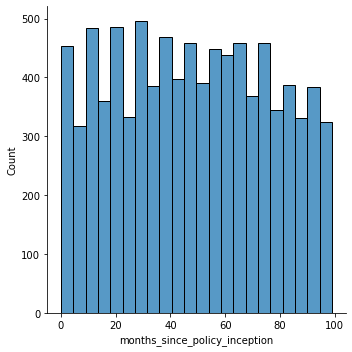

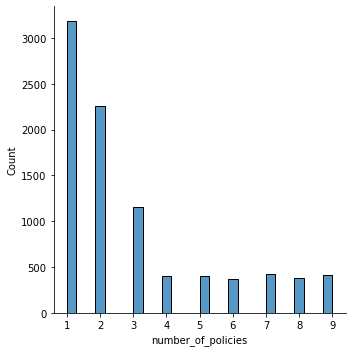

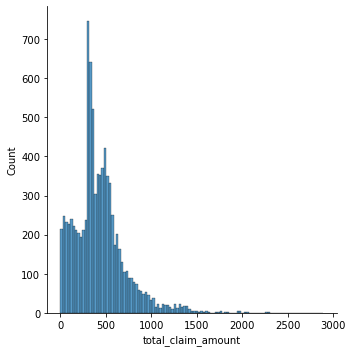

In [16]:
for x in numericals.columns:
    sns.displot(numericals[x])
plt.show()

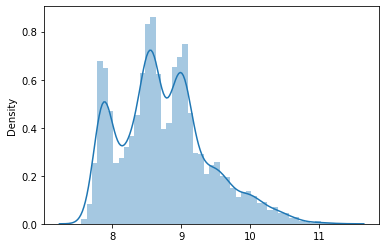

In [19]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later   # in the code to be used with dataframe, we will use np.NaN here 
customer_lifetime_value_log = list(map(log_transfom_clean_, data['customer_lifetime_value']))
sns.distplot(customer_lifetime_value_log)
plt.show()

In [20]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,1,384.811147
1,6979.535903,0,94,13,42,8,1131.464935
2,12887.431650,48767,108,18,38,2,566.472247
3,7645.861827,0,106,18,65,7,529.881344
4,2813.692575,43836,73,12,44,1,138.130879


In [ ]:
#Income

In [23]:
numericals['customer_lifetime_value_log'] = customer_lifetime_value_log

In [ ]:
med = df['life_sq'].median()
df['life_sq'] = df['life_sq'].fillna(med)

In [24]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,customer_lifetime_value_log
0,2763.519279,56274,69,32,5,1,384.811147,7.924260
1,6979.535903,0,94,13,42,8,1131.464935,8.850738
2,12887.431650,48767,108,18,38,2,566.472247,9.464008
3,7645.861827,0,106,18,65,7,529.881344,8.941920
4,2813.692575,43836,73,12,44,1,138.130879,7.942253


In [25]:
median_income = numericals['income'].median()

In [26]:
numericals['income'].replace(0,numericals['income'].mean(axis=0),inplace=True)


In [27]:
numericals = numericals.drop(['customer_lifetime_value'],axis=1)

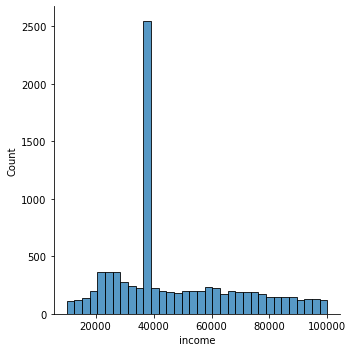

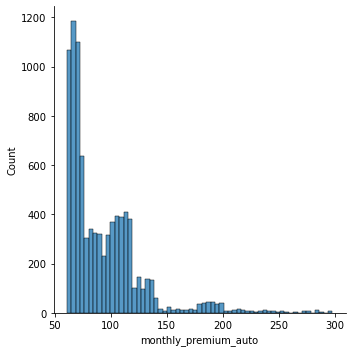

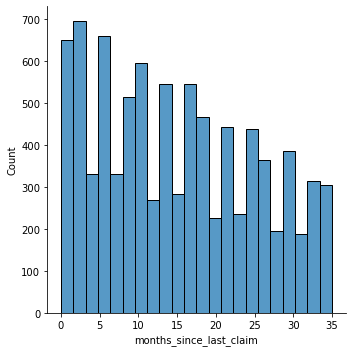

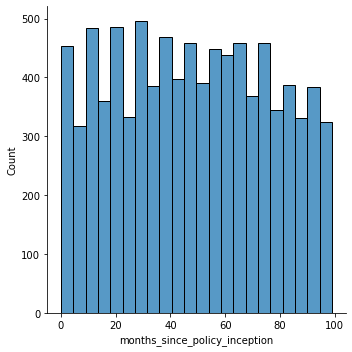

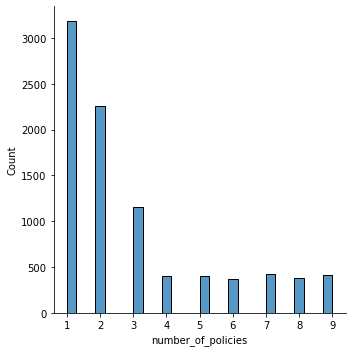

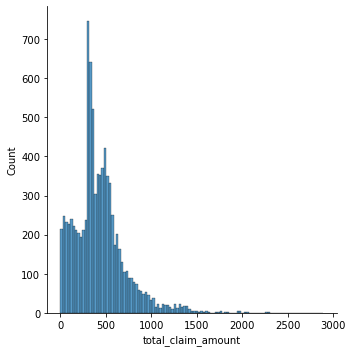

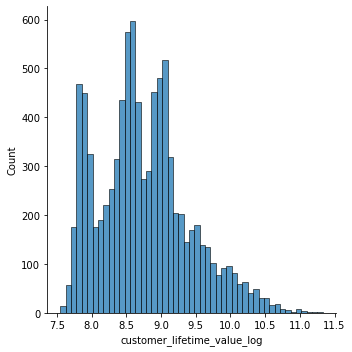

In [41]:
for x in numericals.columns:
    sns.displot(numericals[x])
plt.show()

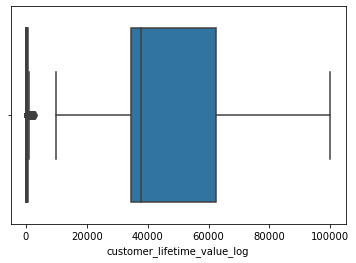

In [44]:
for y in numericals.columns:
    sns.boxplot(x=numericals[y])
plt.show()

In [29]:
categoricals.head()



,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car


In [30]:
categoricals.describe()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
count,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971,8971
unique,5,2,3,5,5,2,3,3,9,4,4,6
top,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Four-Door Car
freq,3081,7826,5469,2704,5604,4579,5656,5210,3334,3685,3394,4542


In [33]:
Y = data['total_claim_amount']
data = data.drop(['total_claim_amount'],axis=1)

In [34]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(numericals)

x_normalized = transformer.transform(numericals)

print(x_normalized.shape)

(8971, 7)


In [40]:
pd.DataFrame(x_normalized)

,0,1,2,3,4,5,6
0,0.999976,0.001226,0.000569,0.000089,0.000018,0.006838,0.000141
1,0.999545,0.002496,0.000345,0.001115,0.000212,0.030043,0.000235
2,0.999930,0.002214,0.000369,0.000779,0.000041,0.011615,0.000194
3,0.999895,0.002815,0.000478,0.001726,0.000186,0.014074,0.000238
4,0.999993,0.001665,0.000274,0.001004,0.000023,0.003151,0.000181
...,...,...,...,...,...,...,...
8966,0.999933,0.002177,0.000335,0.001214,0.000021,0.011332,0.000174
8967,0.999995,0.001015,0.000250,0.001237,0.000028,0.002756,0.000140
8968,0.999776,0.002257,0.000239,0.000983,0.000053,0.021002,0.000239
8969,0.999493,0.004373,0.001549,0.000137,0.000137,0.031487,0.000407


In [45]:
from sklearn import preprocessing

In [46]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
# encoder.categories_
encoded = encoder.transform(categoricals).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [50]:
X = np.concatenate((x_normalized, encoded), axis=1)

In [51]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.999976,0.001226,0.000569,0.000089,0.000018,0.006838,0.000141,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.999545,0.002496,0.000345,0.001115,0.000212,0.030043,0.000235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.999930,0.002214,0.000369,0.000779,0.000041,0.011615,0.000194,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.999895,0.002815,0.000478,0.001726,0.000186,0.014074,0.000238,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.999993,0.001665,0.000274,0.001004,0.000023,0.003151,0.000181,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [53]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.999710,0.002390,0.000398,0.001461,0.000080,0.023907,0.000232,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.999881,0.003141,0.000859,0.000681,0.000059,0.015076,0.000280,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.999996,0.001716,0.000792,0.001716,0.000211,0.001083,0.000226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.999925,0.002473,0.000678,0.001356,0.000040,0.011873,0.000310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999992,0.000799,0.000275,0.000367,0.000092,0.003834,0.000111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5377,0.999983,0.004449,0.000755,0.003232,0.000126,0.001591,0.000376,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5378,0.999971,0.003033,0.000000,0.000489,0.000033,0.006973,0.000179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5379,0.999900,0.002822,0.000465,0.002481,0.000124,0.013640,0.000275,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5380,0.999989,0.000954,0.000336,0.000389,0.000040,0.004577,0.000116,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.9360313658006039

In [55]:
X_train.shape

(5382, 46)

In [56]:
y_train.shape

(5382,)

In [57]:
len(lm.predict(X_test))

3589

In [63]:
mse = mean_squared_error(y_train, predictions)
print(mse)

ValueError: Found input variables with inconsistent numbers of samples: [5382, 3589]

In [59]:
rmse = math.sqrt(mse)
print(rmse)

72.12918187617052


In [60]:
r2 = r2_score(y_test, predictions)
r2

0.9360313658006039

In [61]:
n = len(X_test) 
p = X_test.shape[1]

In [62]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.9352006043174949